In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import glob

In [2]:
df_learn_lst = []
df_runtime_lst = []

for data_file in glob.glob("../experiments/randman/results_data/df_learn_*.csv"):
    df_learn_lst.append(pd.read_csv(data_file))

for data_file in glob.glob("../experiments/randman/results_data/df_runtime_*.csv"):
    df_runtime_lst.append(pd.read_csv(data_file))

df_learn = pd.concat(df_learn_lst, ignore_index=True)
df_runtime = pd.concat(df_runtime_lst, ignore_index=True)

df_learn.drop(columns="Unnamed: 0", inplace=True)
df_runtime.drop(columns="Unnamed: 0", inplace=True)

df_learn["N Synapses"] = df_learn["N Input"] * df_learn["N Hidden"] +  df_learn["N Hidden"] * df_learn["N Output"]
df_runtime["N Synapses"] = df_runtime["N Input"] * df_runtime["N Hidden"] +  df_runtime["N Hidden"] * df_runtime["N Output"]

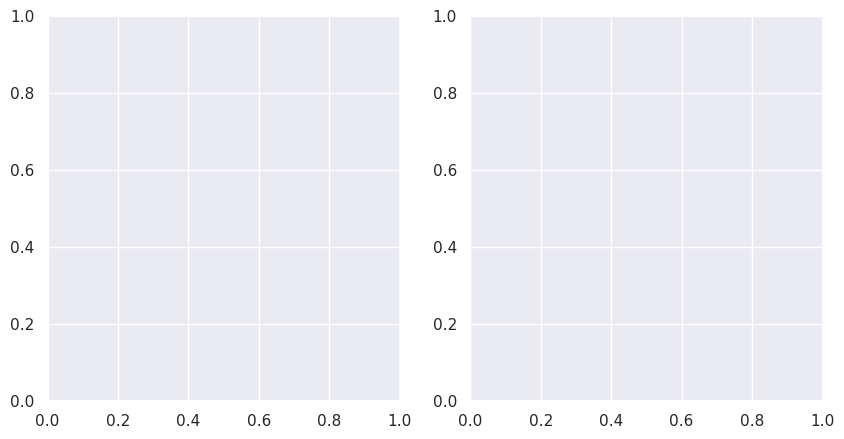

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))



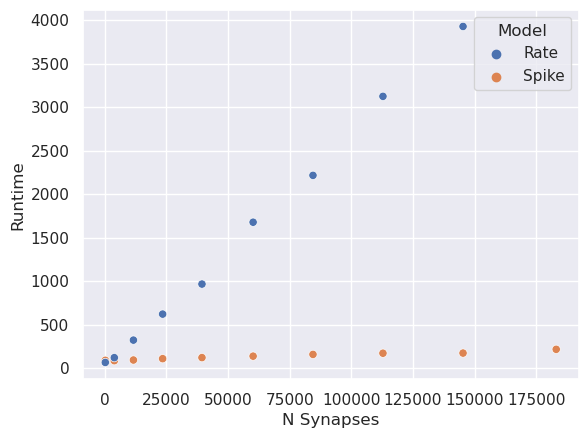

In [4]:
fig, ax = plt.subplots(1,1)

sns.scatterplot(df_runtime[(df_runtime["Method"]=="Feedback Align") & (df_runtime["Spike Threshold"] <= 1e-5)],
                x="N Synapses", y="Runtime",
                hue="Model", ax=ax)

#ax.set_ylim(top=1000)
#ax.set_xlim(right=50000)

plt.show()

In [5]:
df_runtime[(df_runtime["Method"]=="Backprop") & (df_runtime["Spike Threshold"] <= 1e-5) & (df_runtime["Model"]=="Rate")]3

,Runtime,Sim ID,Model,Method,N Input,N Hidden,N Output,Spike Threshold,N Synapses
15,124.008528,0,Rate,Backprop,52,42,42,0.0,3948
89,76.294317,0,Rate,Backprop,20,10,10,0.0,300
143,973.841253,0,Rate,Backprop,148,138,138,0.0,39468
170,628.349918,0,Rate,Backprop,116,106,106,0.0,23532
200,313.285785,0,Rate,Backprop,84,74,74,0.0,11692


In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Feedback Weight Alignment", hue="Model", ax=ax[0])

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Self-Prediction Forward Weight Alignment", hue="Model", ax=ax[1])

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Self-Prediction Backward Weight Alignment", hue="Model", ax=ax[2])

sns.lineplot(df_learn[(df_learn["Method"] == "Feedback Align") & (df_learn["Epoch"] <= 10)],
             x="Epoch", y="Self-Prediction Bias Alignment", hue="Model", ax=ax[3])

fig.tight_layout(pad=1.0)

plt.show()